# Objetivo

- O objetivo deste estudo é colocar em prática os conceitos aprendidos no MBA Data Science & Analytics da USP/Esalq relacionados a Regressão Linear. Para isso foi escolhido um problema de Regressão Linear Múltipla disponível na plataforma Kaggle.

***A ordem da aplicação dos conceitos podem não apresentar uma ordem lógica, visto que o intuito é a aplicação dos conceitos.***

## Conceitos 

- Dentre os conceitos que serão abordados, estão:
    * Análise exploratória dos dados;
    * Criação do modelo;
    * Análise da significância estatística das variáveis independentes (f test, t test);
    * Problemas de Multicolinearidade (VIF e Tolerance);
    * Probelmas de Heterocedasticidade (Breusch-Pagan e Goldfeld-Quandt);
    * Stepwise;
    * Verificar a aderência dos resíduos à normalidade (Shapiro Fracia);
    * Transformação da variável dependente (Box-Cox), caso os resíduos não tenham aderência à normalidade;
    * Comparação e seleção do melhor modelo (R2, R2 ajustado, EQM, RMSE);

## Resultado esperado

- Obter o melhor modelo e criar um deploy em cloud para testes.

## Contexto

### Introdução
Repositório: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data   

Como mencionado acima, é um dataset de Regressão Linear Múltipla. O resultado que se espera deste trabalho é prever preços de imóveis baseado em algumas características que serão descritas abaixo.

### Descrição do dataset
Dados de preços de casas em Boston de Harrison, D. e Rubinfeld, D.L. 'Preços hedônicos e a demanda por ar limpo', J. Environ. Economics & Management, vol.5, 81-102, 1978.

### Informações dos atributos:
**Variáveis independentes**:
1) CRIM: taxa de criminalidade per capita por cidade
2) ZN: proporção de terrenos residenciais zoneados para lotes acima de 25.000 pés quadrados.
3) INDUS: proporção de acres de negócios não varejistas por cidade
4) CHAS: variável fictícia do Rio Charles (1 se o trato limita o rio; 0 caso contrário)
5) NOX: concentração de óxidos nítricos (partes por 10 milhões) [partes/10M]
6) RM: número médio de cômodos por moradia
7) AGE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940
8) DIS: distâncias ponderadas para cinco centros de emprego de Boston
9) RAD: índice de acessibilidade a rodovias radiais
10) TAX: taxa de imposto sobre a propriedade de valor integral por US$ 10.000 [US$/10k]
11) PTRATIO: proporção aluno-professor por cidade
12) B: O resultado da equação B=1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade
13) LSTAT: % de status inferior da população

**Variável dependente**:
1) MEDV: Valor médio de casas ocupadas pelos proprietários em milhares de dólares [k$]

# Instalação e importação das bibiliotecas e Dataset

## Instalação

In [20]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install statsmodels
!pip install statstests
!pip install scikit-learn

## Importação das bibliotecas

In [82]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
from scipy.stats import pearsonr # correlações de Pearson
import statsmodels.api as sm # estimação de modelos
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox # transformação de Box-Cox
from scipy.stats import norm # para plotagem da curva normal
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer # Padronização
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import het_white, het_goldfeldquandt # testes de Heterocedasticidade

## Importação do Dataset

In [2]:
df = pd.read_csv("boston.csv", delimiter=",")

# Análise Exploratória dos Dados (EDA)

## Exploração de informações básicas do dataset

In [35]:
# Visualização da estrutura do dataset (quantidade de linhas, quantidade de colunas)
df.shape

(506, 14)

In [33]:
# Visualização das primeiras e últimas linhas do dataset
"""
poderíamos fazer também:
df.head() -> 5 primeiras linhas
df.tail() -> 5 últimas linhas
"""
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [37]:
# Entender os tipos de variáveis que há no dataset (mesmo já tendo essa descrição no "Contexto")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [46]:
# Como já é informado que a variável CHAS é uma dummy, ela será removida na visualização 
# das estatísticas descritivas
df.drop('CHAS', axis=1).describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Reflexão sobre informações básicas do dataset:
- O dataset é composto, marjoritariamente, de variáveis quantitativas;
- Há, dentro das variáveis quantitativas, apenas uma variável discreta - eliminando desta análise a dummy - e o restante são contínuas;
- A amplitude das variáveis são bem diferentes;
- Não há valores faltantes (missed values - NaN);

## Renomeação das variáveis

In [5]:
# Para facilitar a visualização das variáveis, todas serão renomeadas em um novo dataset
dfr = df.copy()

In [7]:
dfr.rename(columns={
    'CRIM': 'taxa_crime_p_cidade',
    'ZN': 'proporcao_terreno_zoneados',
    'INDUS': 'proporcao_negocios_p_cidade',
    'CHAS': 'rio_charles',
    'NOX': 'concentracao_oxidos_nitricos',
    'RM': 'numero_medio_comodos',
    'AGE': 'proporcao_proprietarios_casas_1940',
    'DIS': 'distancia_centro_empresarial',
    'RAD': 'indice_accessibilidade_rodovias',
    'TAX': 'taxa_imposto',
    'PTRATIO': 'proporcao_alunos_x_professor_p_cidade',
    'B': 'proporcao_comunidade_negra_p_cidade',
    'LSTAT': 'proporcao_pobreza',
    'MEDV': 'valor_medio_casas_ocupadas'
}, inplace=True)

## Exploração de outliers nas variáveis independentes

In [89]:
dfr

,taxa_crime_p_cidade,proporcao_terreno_zoneados,proporcao_negocios_p_cidade,rio_charles,concentracao_oxidos_nitricos,numero_medio_comodos,proporcao_proprietarios_casas_1940,distancia_centro_empresarial,indice_accessibilidade_rodovias,taxa_imposto,proporcao_alunos_x_professor_p_cidade,proporcao_comunidade_negra_p_cidade,proporcao_pobreza,valor_medio_casas_ocupadas
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


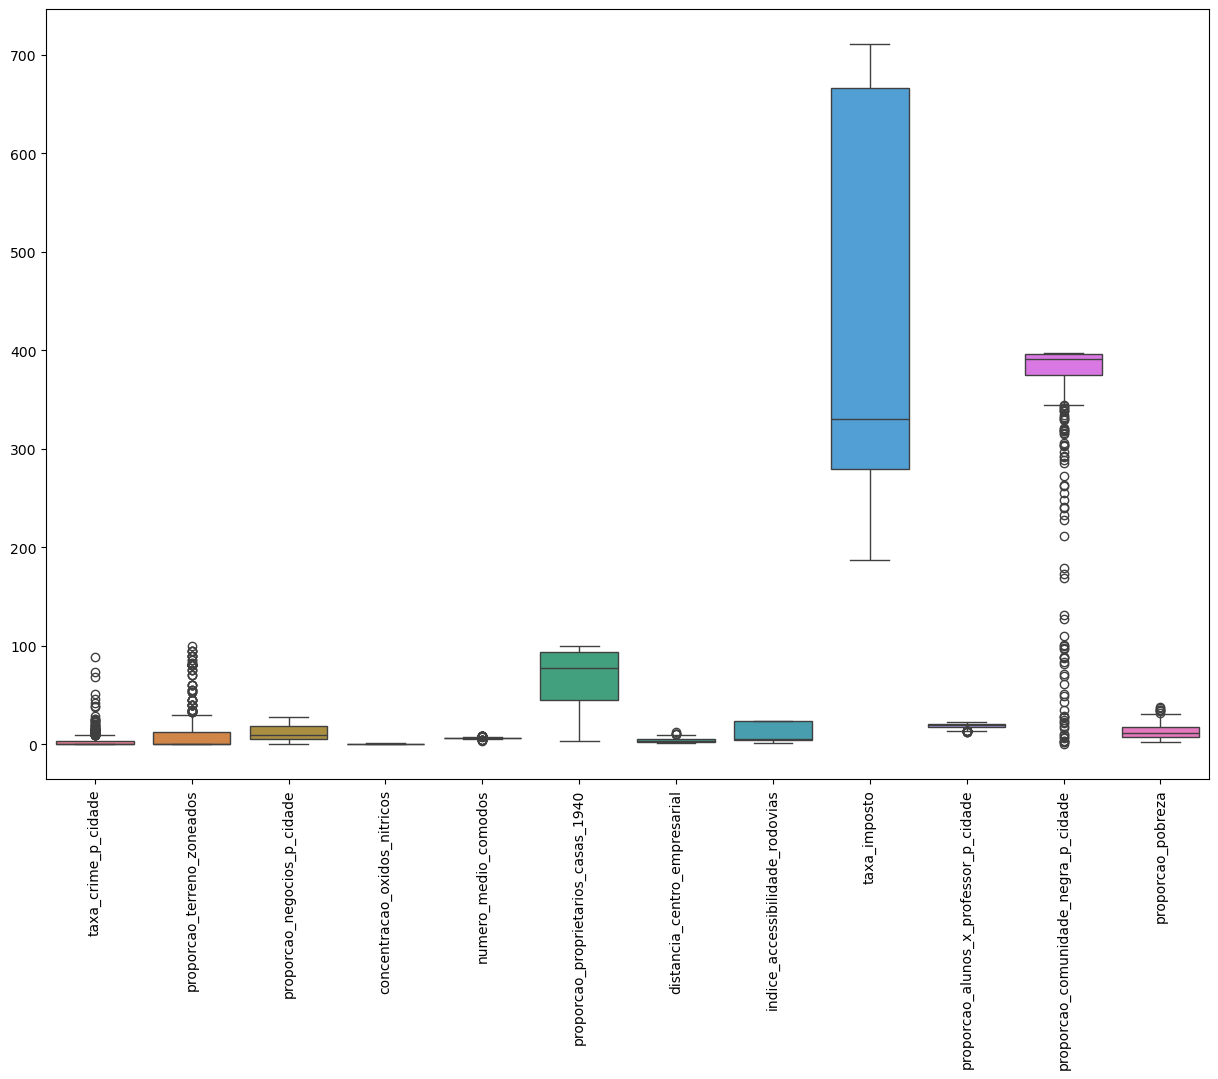

In [93]:
# As variáveis rio_charles (dummy) e valor_medio_casas_ocupadas (dependente) foram removidas desta visualização. 
# O objetivo é ter uma visão geral da existência de outliers nas variáveis independentes.

plt.figure(figsize=(15,10))
sns.boxplot(data=dfr.drop(['rio_charles', 'valor_medio_casas_ocupadas'], axis=1))
plt.xticks(rotation=90)
plt.show()

### Reflexão sobre a presença de outliers
- As variáveis taxa_crime_p_cidade, proporcao_terreno_zoneados e proporcao_comunidade_negra_p_cidade apresentam presença de outliers;
- Uma possível solução pode ser a padronização destas variáveis;
- Por hora, nenhuma transformação será aplicada;

## Exploração das distribuições das variáveis

### Variável dependente: valor_medio_casas_ocupadas

<Figure size 1500x1000 with 0 Axes>

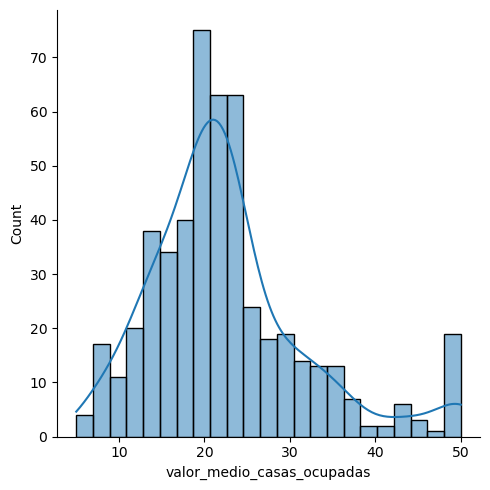

In [104]:
plt.figure(figsize=(15,10))
sns.displot(data=dfr, x='valor_medio_casas_ocupadas', kde=True)
plt.show()

#### Reflexão
- a variável dependente, aparentemente, não possui uma distribuição normal

### Variável independente: taxa_crime_p_cidade

<Figure size 1500x1000 with 0 Axes>

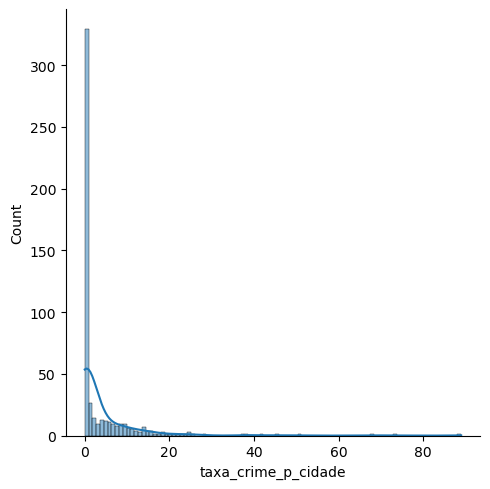

In [110]:
plt.figure(figsize=(15, 10))
sns.displot(data=dfr, x="taxa_crime_p_cidade", kde=True)
plt.show()

#### Reflexão:
- Aparentemente, a variável taxa_crime_p_cidade possui uma distribuição poisson gama com zero-inflated

### Variável independente: proporcao_terreno_zoneados

<Figure size 1500x1000 with 0 Axes>

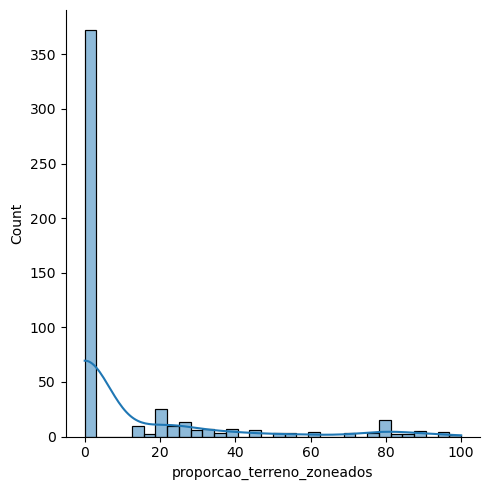

In [118]:
plt.figure(figsize=(15, 10))
sns.displot(data=dfr, x="proporcao_terreno_zoneados", kde=True)
plt.show()

#### Reflexão:
- Aparentemente, a variável proporcao_terreno_zoneados possui uma distribuição poisson gama com zero-inflated


### Variável independente: proporcao_negocios_p_cidade

<Figure size 1500x1000 with 0 Axes>

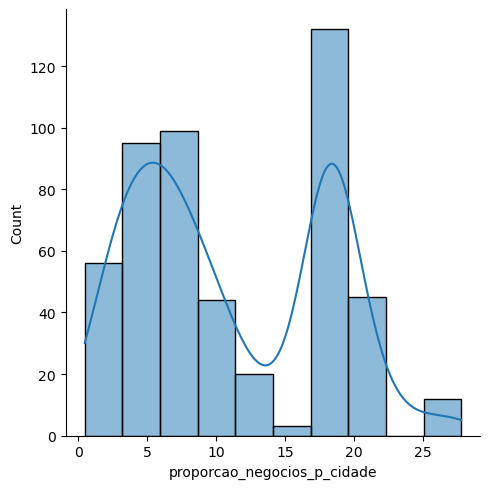

In [121]:
plt.figure(figsize=(15, 10))
sns.displot(data=dfr, x="proporcao_negocios_p_cidade", kde=True)
plt.show()

#### Reflexão:
- Não há uma coesão sobre a distribuição da variável proporcao_negocios_p_cidade

### Variável independente: concentracao_oxidos_nitricos

<Figure size 1500x1000 with 0 Axes>

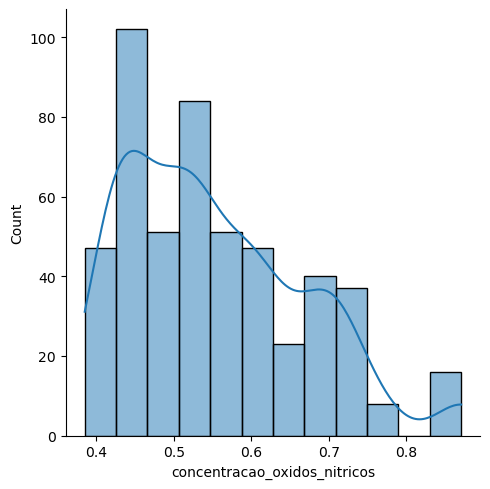

In [126]:
plt.figure(figsize=(15, 10))
sns.displot(data=dfr, x="concentracao_oxidos_nitricos", kde=True)
plt.show()

#### Reflexão:
- A distribuição da variável concentracao_oxidos_nitricos lembra um distribuição poisson

### Variável independente: numero_medio_comodos

<Figure size 1500x1000 with 0 Axes>

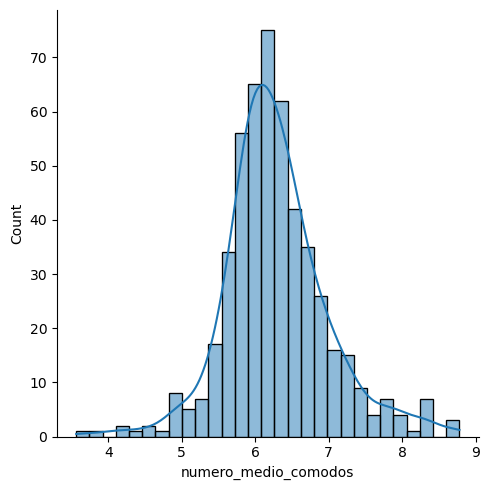

In [131]:
plt.figure(figsize=(15, 10))
sns.displot(data=dfr, x="numero_medio_comodos", kde=True)
plt.show()

#### Reflexão:
- A distribuição da variável numero_medio_comodos parece uma distribuição normal

### Variável independente: proporcao_proprietarios_casas_1940

<Figure size 1500x1000 with 0 Axes>

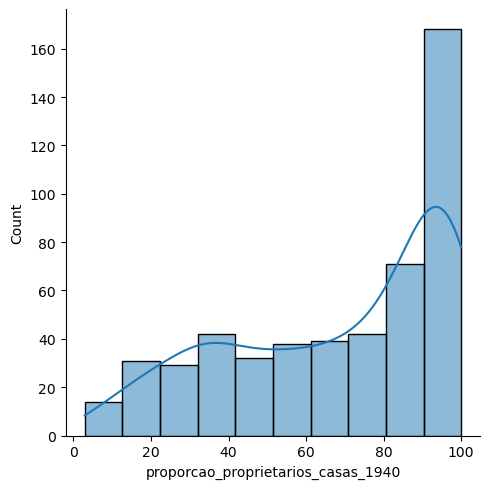

In [134]:
plt.figure(figsize=(15, 10))
sns.displot(data=dfr, x="proporcao_proprietarios_casas_1940", kde=True)
plt.show()

#### Reflexão:
- A distribuição da variável proporcao_proprietarios_casas_1940 parece uma distribuição poisson invertida

### Variável independente: distancia_centro_empresarial

<Figure size 1500x1000 with 0 Axes>

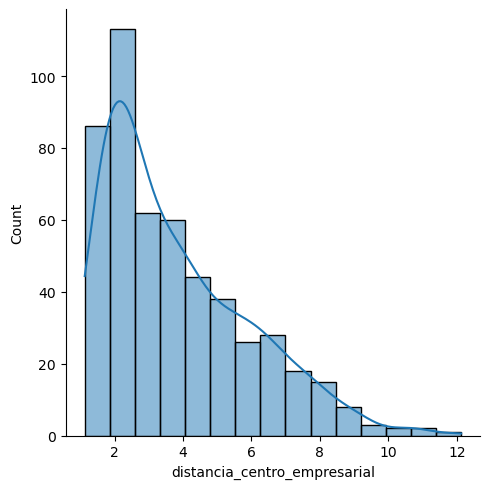

In [139]:
plt.figure(figsize=(15, 10))
sns.displot(data=dfr, x="distancia_centro_empresarial", kde=True)
plt.show()

#### Reflexão:
- A distribuição da variável distancia_centro_empresarial parece uma distribuição poisson

### Variável independente: indice_accessibilidade_rodovias

<Figure size 1500x1000 with 0 Axes>

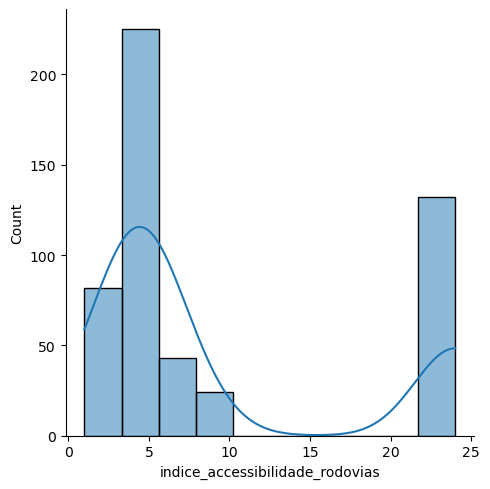

In [143]:
plt.figure(figsize=(15, 10))
sns.displot(data=dfr, x="indice_accessibilidade_rodovias", kde=True)
plt.show()

#### Reflexão:
- A distribuição da variável indice_accessibilidade_rodovias não lembra uma distribuição conhecida

### Variável independente: taxa_imposto

<Figure size 1500x1000 with 0 Axes>

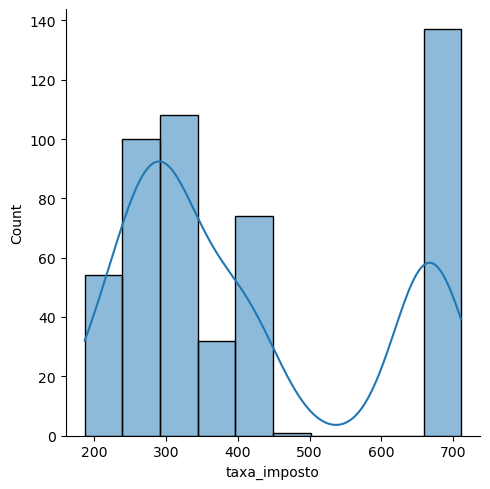

In [147]:
plt.figure(figsize=(15, 10))
sns.displot(data=dfr, x="taxa_imposto", kde=True)
plt.show()

#### Reflexão:
- A distribuição da variável taxa_imposto parece uma distribuição não lembra uma distribuição conhecida

### Variável independente: proporcao_alunos_x_professor_p_cidade

<Figure size 1500x1000 with 0 Axes>

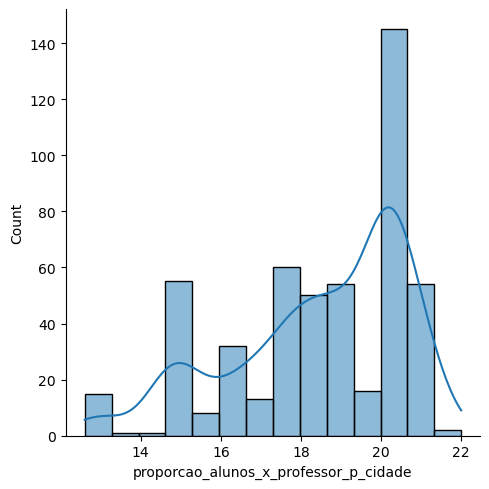

In [151]:
plt.figure(figsize=(15, 10))
sns.displot(data=dfr, x="proporcao_alunos_x_professor_p_cidade", kde=True)
plt.show()

#### Reflexão:
- A distribuição da variável proporcao_alunos_x_professor_p_cidade lembra uma distribuição assimétrica

### Variável independente: proporcao_comunidade_negra_p_cidade

<Figure size 1500x1000 with 0 Axes>

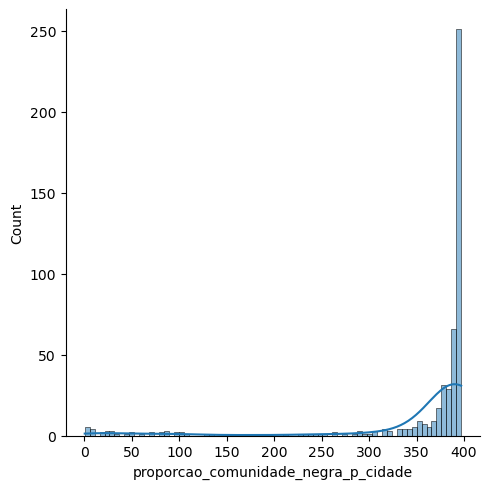

In [155]:
plt.figure(figsize=(15, 10))
sns.displot(data=dfr, x="proporcao_comunidade_negra_p_cidade", kde=True)
plt.show()

#### Reflexão:
- A distribuição da variável proporcao_comunidade_negra_p_cidade parece uma distribuição poisson gama com zero-inflated invertida

### Variável independente: proporcao_pobreza

<Figure size 1500x1000 with 0 Axes>

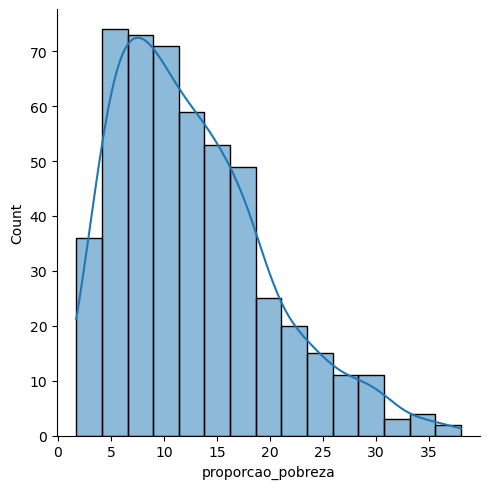

In [159]:
plt.figure(figsize=(15, 10))
sns.displot(data=dfr, x="proporcao_pobreza", kde=True)
plt.show()

#### Reflexão:
- A distribuição da variável proporcao_pobreza parece uma distribuição poisson

### Variável independente: rio_charles (dummy)

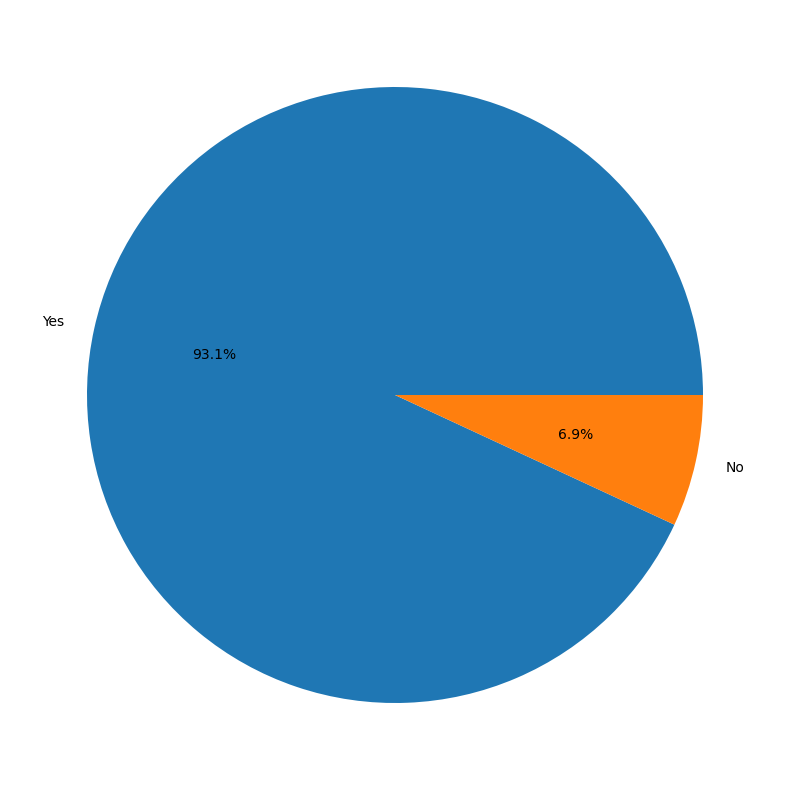

In [172]:
plt.figure(figsize=(15, 10))
plt.pie(dfr['rio_charles'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')
plt.show()

#### Reflexão:
- A varíavel rio_charles é composta em sua maioria por 1, o que siginifica que a maioria das residências estão próximas ao Rio Charles

### Reflexão sobre as distribuições:
- Ainda que não fosse necessário, as variáveis independentes foram plotadas para visualização das suas respectivas distribuições;
- A variável dependente, aparentemente, não possui uma distribuição normal;
    * Pode ser necessário a transformação de box-cox;
    * Pode ser que a Regressão Linear Múltipla não seja a forma funcional mais adequada para este problema;

## Exploração das Correlações entre as variáveis

###  Dispersão e distribuição

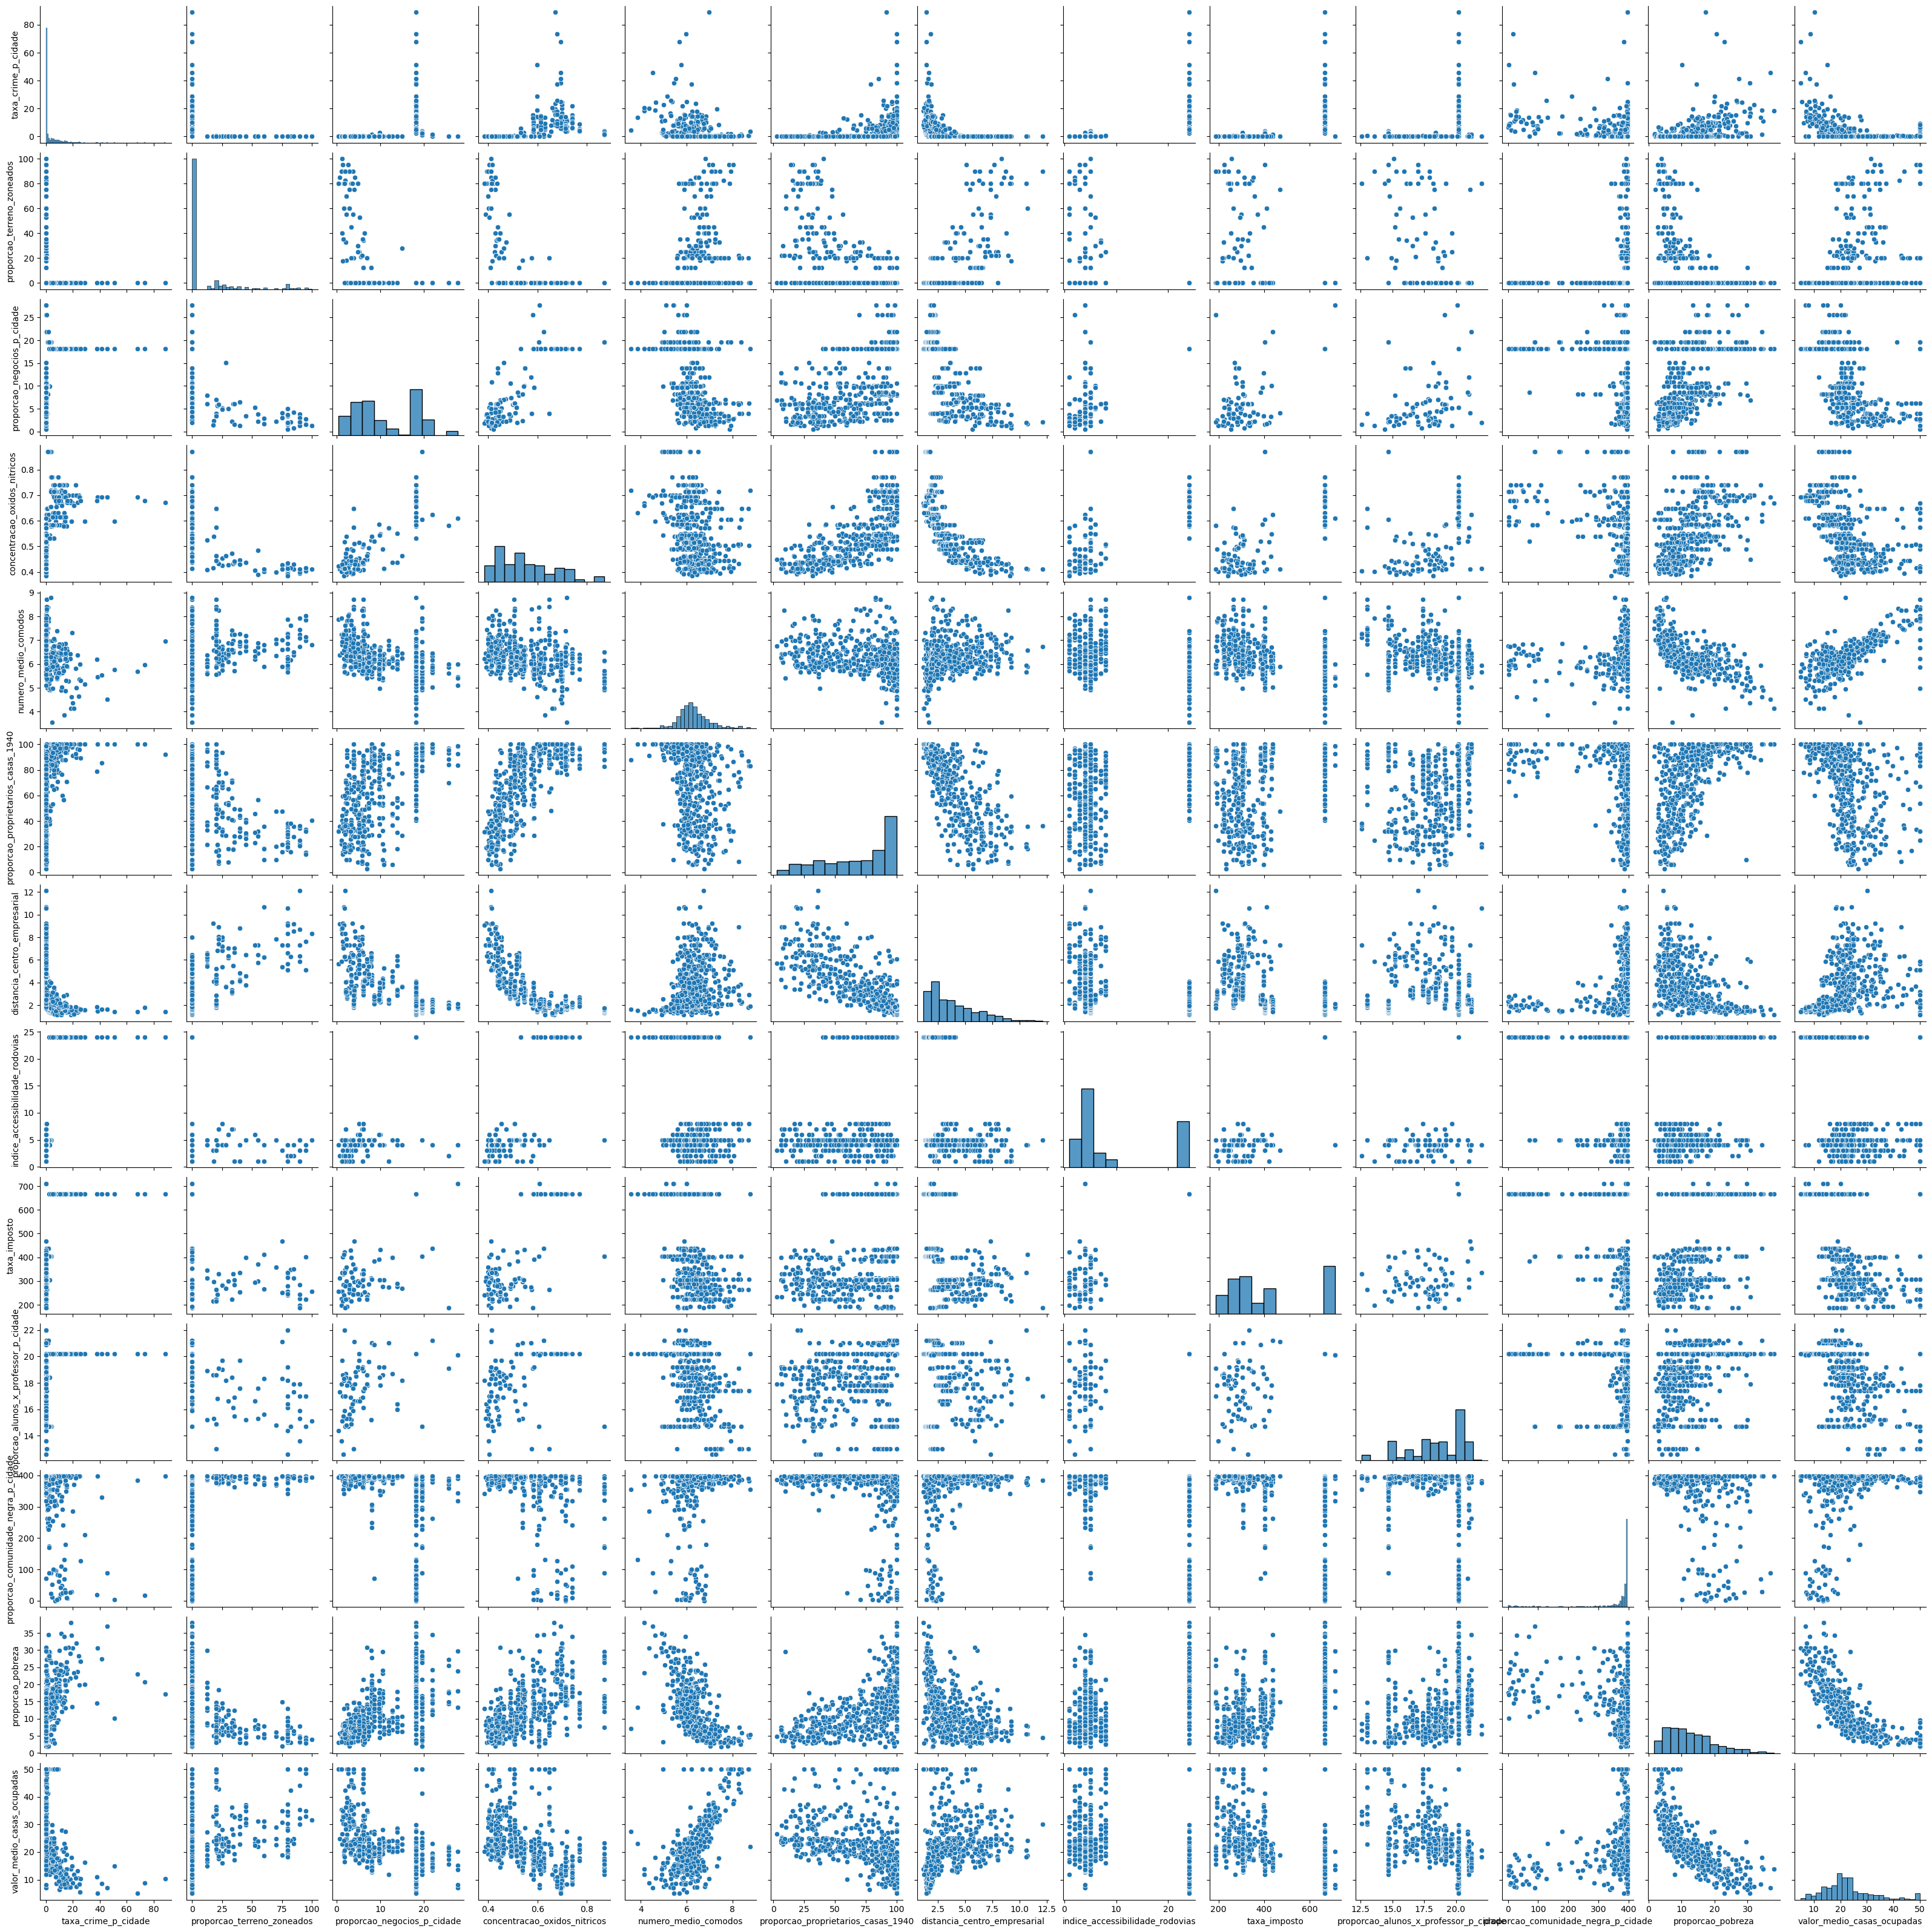

In [187]:
# Exibição de todas as distribuições e dispersão dos dados por par de variáveis
sns.pairplot(dfr.drop('rio_charles', axis=1))
plt.show()

#### Reflexão:
- Algumas variáveis mostram uma possível reta linear;
- Algumas retas são negativas;

### Correlações

In [194]:
dfr_corr = dfr.corr()

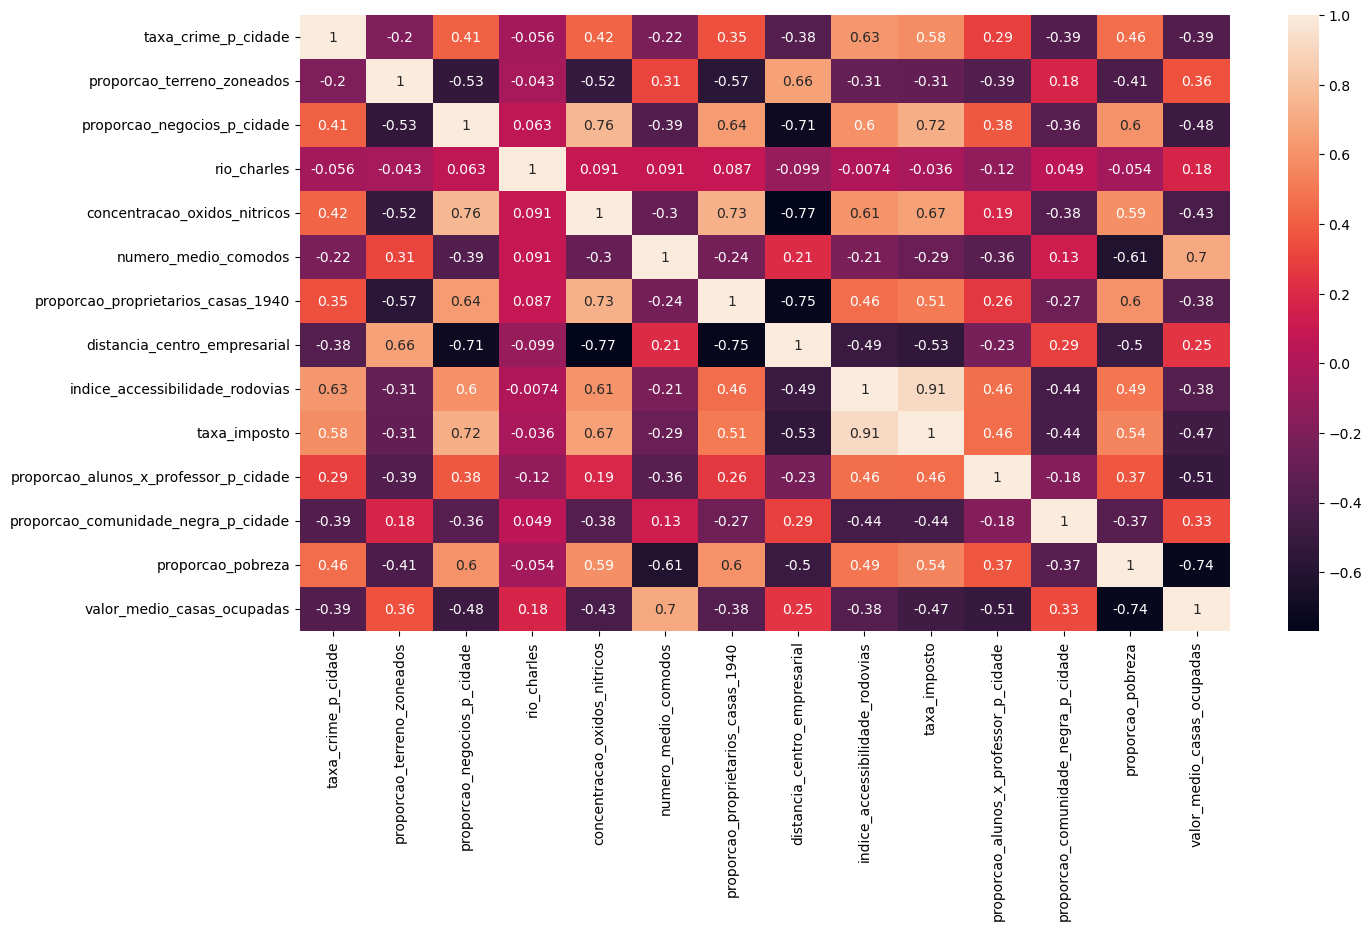

In [228]:
plt.figure(figsize=(15, 8))
sns.heatmap(dfr_corr, annot=True)
plt.show()

#### Reflexão sobre correlações
- As variáveis independentes **proporcao_pobreza** e **numero_medio_comodos** apresentam as maiores correlações com a variável dependente **valor_medio_casas_ocupadas**
- As variáveis independentes apresentam alta correlações entre si, como a proporcao_negocios_p_cidade que apresenta alta correlações com:
    * concentracao_oxidos_nitricos
    * proporcao_proprietarios_casas_1940
    * distancia_centro_empresarial
    * indice_accessibilidade_rodovias
    * taxa_imposto
    * proporcao_pobreza

- Essas altas correlações entre as variávies independentes pode indicar multicolinearidade;

# Modelos

## Modelo 1: com todas as variáveis independentes

### Preparação das variáveis independentes e dependente do modelo 1

In [9]:
# Variáveis independentes
X1 = dfr[dfr.drop('valor_medio_casas_ocupadas', axis=1).columns]
X1.columns

Index(['taxa_crime_p_cidade', 'proporcao_terreno_zoneados',
       'proporcao_negocios_p_cidade', 'rio_charles',
       'concentracao_oxidos_nitricos', 'numero_medio_comodos',
       'proporcao_proprietarios_casas_1940', 'distancia_centro_empresarial',
       'indice_accessibilidade_rodovias', 'taxa_imposto',
       'proporcao_alunos_x_professor_p_cidade',
       'proporcao_comunidade_negra_p_cidade', 'proporcao_pobreza'],
      dtype='object')

In [11]:
# Variável dependente
y1 = dfr[['valor_medio_casas_ocupadas']]
y1.columns

Index(['valor_medio_casas_ocupadas'], dtype='object')

### Criação do modelo 1

In [14]:
# Modelo 1
X1 = sm.add_constant(X1)
model1 = sm.OLS(y1, X1).fit()

### Sumário do modelo 1

In [17]:
print(model1.summary())

                                OLS Regression Results                                
Dep. Variable:     valor_medio_casas_ocupadas   R-squared:                       0.741
Model:                                    OLS   Adj. R-squared:                  0.734
Method:                         Least Squares   F-statistic:                     108.1
Date:                        Sun, 15 Sep 2024   Prob (F-statistic):          6.72e-135
Time:                                10:11:16   Log-Likelihood:                -1498.8
No. Observations:                         506   AIC:                             3026.
Df Residuals:                             492   BIC:                             3085.
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------

#### Reflexão sobre as estatísticas do modelo 1
- O teste F mostra que existe pelo menos um beta estatisticamente significante
- O teste t mostra que os betas *proporcao_negocios_p_cidade* e *proporcao_proprietarios_casas_1940*, na presença de todas as variáveis, não são estatisticamente significantes;
- As variáveis independentes conseguem explicar 74,1% da variação da variável dependente valor_medio_casas_ocupadas 

## Modelo 2: sem as variáveis que não apresentaram significância estatística no modelo 1

### Preparação das variáveis independentes e dependente do modelo 2

In [22]:
# Variáveis independentes 
X2 = dfr.drop([
    'valor_medio_casas_ocupadas', 
    'proporcao_negocios_p_cidade', 
    'proporcao_proprietarios_casas_1940'], 
              axis=1)
X2.columns

Index(['taxa_crime_p_cidade', 'proporcao_terreno_zoneados', 'rio_charles',
       'concentracao_oxidos_nitricos', 'numero_medio_comodos',
       'distancia_centro_empresarial', 'indice_accessibilidade_rodovias',
       'taxa_imposto', 'proporcao_alunos_x_professor_p_cidade',
       'proporcao_comunidade_negra_p_cidade', 'proporcao_pobreza'],
      dtype='object')

In [24]:
y2 = dfr[['valor_medio_casas_ocupadas']]
y2.columns

Index(['valor_medio_casas_ocupadas'], dtype='object')

### Criação do modelo 2

In [27]:
# Criação do modelo 2
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2).fit()

### Sumário do modelo 2

In [30]:
print(model2.summary())

                                OLS Regression Results                                
Dep. Variable:     valor_medio_casas_ocupadas   R-squared:                       0.741
Model:                                    OLS   Adj. R-squared:                  0.735
Method:                         Least Squares   F-statistic:                     128.2
Date:                        Sun, 15 Sep 2024   Prob (F-statistic):          5.54e-137
Time:                                10:11:22   Log-Likelihood:                -1498.9
No. Observations:                         506   AIC:                             3022.
Df Residuals:                             494   BIC:                             3072.
Df Model:                                  11                                         
Covariance Type:                    nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------

#### Reflexão sobre as estatísticas do modelo 2
- O teste F mostra que existe pelo menos um beta estatisticamente significante
- O teste t mostra que, com a exclusão das variáveis sem significância estatística do modelo 1, todos os betas são, agora, estatisticamente significantes;
- Removendo as varíaveis sem significância estatística, as variáveis independentes conseguem explicar 74,1% da variação da variável dependente valor_medio_casas_ocupadas. Ou seja, o modelo não perdeu seu poder explicativo, pois o ***R2 ajustado*** se manteve o mesmo.

# Análise dos modelos

## Diagnóstico de Multicolinearidade

### Função para calcular o VIF
- para otimizar o processo de cálculo do VIF, será criada uma função genérica

In [36]:
def vif_calc(X, vif_df):
    for i in range(len(X.columns)):
        vif = variance_inflation_factor(X.values, i)
        vif_df.loc[i, "VIF"] = vif

    return vif_df

### Modelo 1

#### Cálculo do VIF e Tolerance para o modelo 1

In [40]:
# VIF
vif1 = pd.DataFrame()
vif1['feature'] = X1.columns 
vif1 = vif_calc(X1, vif1)

In [42]:
# Tolerance
vif1['tolerance'] = 1/vif1['VIF']

In [44]:
# Exibindo o VIF e Tolerance para cada variável independente do modelo 1
vif1

,feature,VIF,tolerance
0,const,585.265238,0.001709
1,taxa_crime_p_cidade,1.792192,0.557976
2,proporcao_terreno_zoneados,2.298758,0.435017
3,proporcao_negocios_p_cidade,3.991596,0.250526
4,rio_charles,1.073995,0.931103
5,concentracao_oxidos_nitricos,4.393720,0.227598
6,numero_medio_comodos,1.933744,0.517131
7,proporcao_proprietarios_casas_1940,3.100826,0.322495
8,distancia_centro_empresarial,3.955945,0.252784
9,indice_accessibilidade_rodovias,7.484496,0.133610


#### Reflexão sobre multicolinearidade do modelo 1:
- As variáveis independentes indice_accessibilidade_rodovias e taxa_imposto apresentam um alto VIF e baixa Tolerance, indicando problemas de multicolinearidade

### Modelo 2

#### Cálculo do VIF e Tolerance para o modelo 1

In [49]:
# VIF
vif2 = pd.DataFrame()
vif2['feature'] = X2.columns
vif2 = vif_calc(X2, vif2)

In [51]:
# Tolerance
vif2['tolerance'] = 1/vif2['VIF']

In [53]:
# Exibindo VIF e Tolerance para o modelo 2
vif2

,feature,VIF,tolerance
0,const,579.255845,0.001726
1,taxa_crime_p_cidade,1.789704,0.558752
2,proporcao_terreno_zoneados,2.239229,0.446582
3,rio_charles,1.059819,0.943557
4,concentracao_oxidos_nitricos,3.778011,0.264690
5,numero_medio_comodos,1.834806,0.545017
6,distancia_centro_empresarial,3.443420,0.290409
7,indice_accessibilidade_rodovias,6.861126,0.145749
8,taxa_imposto,7.272386,0.137506
9,proporcao_alunos_x_professor_p_cidade,1.757681,0.568931


#### Reflexão sobre multicolinearidade do modelo 2:
- As variáveis independentes indice_accessibilidade_rodovias e taxa_imposto também apresentam um alto VIF e baixa Tolerance, indicando problemas de multicolinearidade no modelo 2

### Antes de aplicar o Stepwise para resolver a questão da multicolinearidade, será feito o teste de Heterocedasticidade

## Diagnóstico de Heterocedasticidade

### Serão criadas algumas funções para auxílio nos testes de Heterocedasticidade 
- uma função para ajudar na plotagem dos Resíduos vs. Valores Ajustados (fitted values)
- uma função para o teste de Breusch-Pagan
- uma função para o teste de Goldfeld-Quandt

In [59]:
def resid_fittedvalues_plot(fittedvalues, resid, model_name):
    plt.figure(figsize=(15,10))

    plt.scatter(fittedvalues, resid, alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--')

    plt.xlabel('Valores Ajustados')
    plt.ylabel('Resíduos') 
    plt.title(f'Gráfico de Resíduos vs. Valores Ajustados do {model_name}')
    
    plt.show()

#### Teste de Hipótese:
Hipótese Nula: A variância dos erros é constante (homocedasticidade).   
Hipótese Alternativa: A variância dos erros não é constante (heterocedasticidade)

##### Interpretação do p-valor:   
**p-valor < α** (nível de significância, geralmente 0.05): Rejeita-se a hipótese nula, indicando que há evidências de heterocedasticidade. Ou seja, a variância dos erros não é constante.
    
**p-valor ≥ α:** Não se rejeita a hipótese nula, não há evidências suficientes para concluir que a variância dos erros é diferente.


In [62]:
def breusch_pagan_test(model):
    _, pval, _, _ = het_white(model.resid, model.model.exog)
    print(f'p-value do teste de Breusch-Pagan: {pval}')
    if pval >= .05:
        print('A variância dos erros É constante (homocedasticidade)')
    else:
        print('A variância dos erros NÃO é constante (heterocedasticidade)')

In [64]:
def goldfeld_quandt_test(model):
    gq_test = het_goldfeldquandt(model.resid, model.model.exog)
    print(f'Teste de Goldfeld-Quandt: {gq_test}')
    if gq_test[1] >= .05:
        print('A variância dos erros É constante (homocedasticidade)')
    else:
        print('A variância dos erros NÃO é constante (heterocedasticidade)')

### Modelo 1

#### Gráfico dos fitted values e resíduos do modelo 1

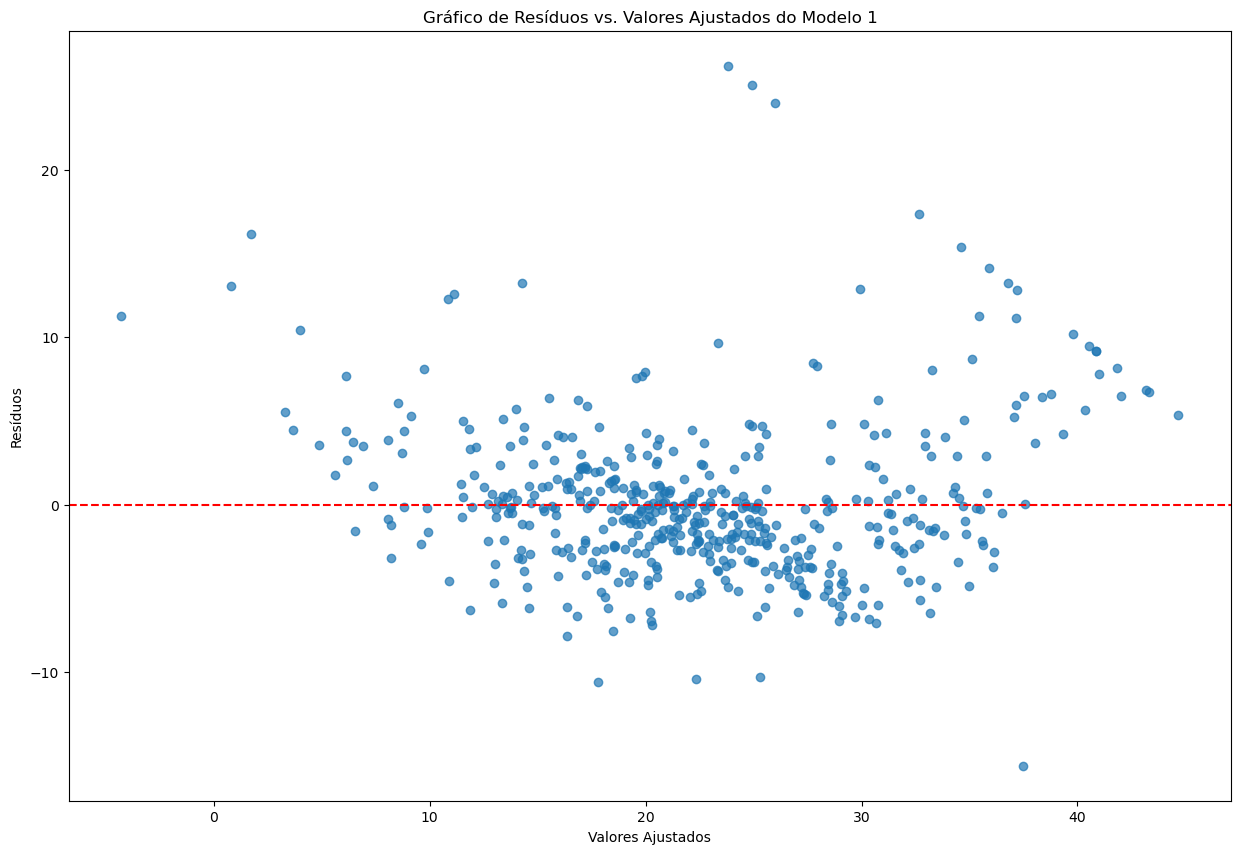

In [68]:
resid_fittedvalues_plot(model1.fittedvalues, model1.resid, 'Modelo 1')

#### Testes de Heterocedasticidade

In [71]:
# Teste de Breusch-Pagan do modelo 1
breusch_pagan_test(model1)

p-value do teste de Breusch-Pagan: 2.266143007316633e-25
A variância dos erros NÃO é constante (heterocedasticidade)


In [73]:
# Teste de Goldfeld-Quandt do modelo 1
goldfeld_quandt_test(model1)

Teste de Goldfeld-Quandt: (2.4311473253497433, 7.30207191560949e-12, 'increasing')
A variância dos erros NÃO é constante (heterocedasticidade)


#### Reflexão sobre os testes de Heterocedasticidade do modelo 1:
- De acordo com os testes de Breusch-Pagan e Goldfeld-Quandt o modelo 1 possui Heterocedasticidade;
- Neste caso, como o dataset não possui mais variáveis independentes, não é possível trabalhar este problema;

### Modelo 2

#### Gráfico dos fitted values e resíduos do modelo 1

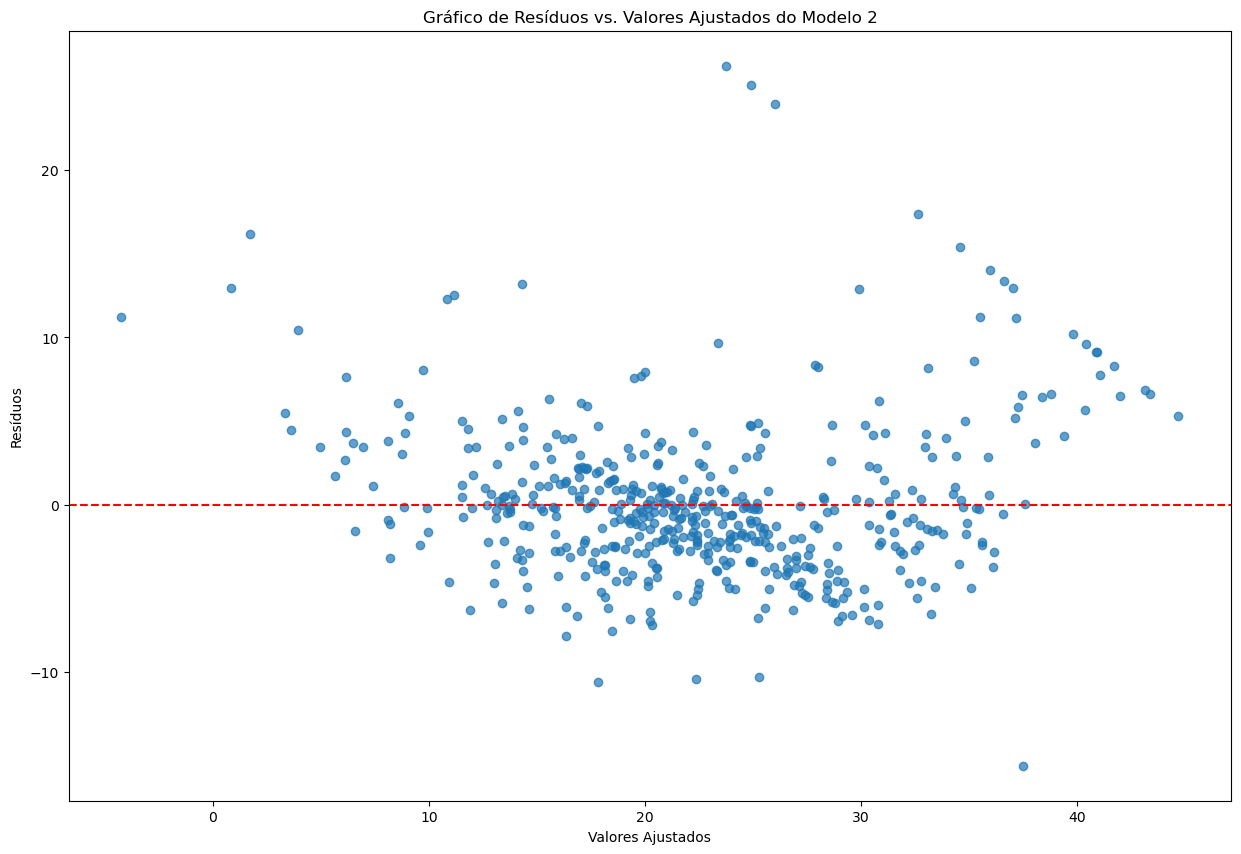

In [78]:
resid_fittedvalues_plot(model2.fittedvalues, model2.resid, 'Modelo 2')

#### Testes de Heterocedasticidade

In [95]:
# Teste de Breusch-Pagan do modelo 2
breusch_pagan_test(model2)

p-value do teste de Breusch-Pagan: 1.804088025519351e-30
A variância dos erros NÃO é constante (heterocedasticidade)


In [97]:
# Teste de Goldfeld-Quandt do modelo 2
goldfeld_quandt_test(model2)

Teste de Goldfeld-Quandt: (2.283670708634396, 1.3454126630538968e-10, 'increasing')
A variância dos erros NÃO é constante (heterocedasticidade)


#### Reflexão sobre os testes de Heterocedasticidade do modelo 2:
- De acordo com os testes de Breusch-Pagan e Goldfeld-Quandt o modelo 2 possui Heterocedasticidade;
- Neste caso, como o dataset não possui mais variáveis independentes, não é possível trabalhar este problema;

## Análise da aderência dos resíduos à normalidade

### Criação de função para o teste Shapiro-Francia
- Esta função é baseada na função ministrada em aula do MBA USP/ESALQ do professor Luiz Paulo Fávero
- Autores da função no Python: Luiz Paulo Fávero e Helder Prado Santos
- Fonte: https://stats-tests.github.io/statstests/

#### Teste de Hipótese:
Hipótese Nula: A distribuição dos resíduos É aderente à normalidade.   
Hipótese Alternativa: A distribuição dos resíduos NÃO é aderente à normalidade

##### Interpretação do p-valor*:   
**p-valor > α:** Não se rejeita a hipótese nula.


**p-valor ≤ α** (nível de significância, geralmente 0.05): Rejeita-se a hipótese nula.

In [103]:
def shapiro_francia_test(model):
    teste_sf = shapiro_francia(model.resid)
    
    #retorna o grupo de pares de valores-chave no dicionário
    teste_sf = teste_sf.items() 
    
    #definição dos elementos da lista (tupla)
    method, statistics_W, statistics_z, p = teste_sf 
    print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
    
    #nível de significância
    alpha = 0.05
    
    if p[1] > alpha:
    	print('A distribuição dos resíduos É aderente à normalidade')
    else:
    	print('A distribuição dos resíduos NÃO é aderente à normalidade')

### Criação de função para visualização da distribuição dos resíduos

In [106]:
def resid_plot(model):
    plt.figure(figsize=(15,10))
    
    hist1 = sns.histplot(data=model.resid, kde=True, bins=25,
                         color = 'darkorange', alpha=0.4, edgecolor='silver',
                         line_kws={'linewidth': 3})
    
    hist1.get_lines()[0].set_color('orangered')
    
    plt.xlabel('Resíduos', fontsize=20)
    plt.ylabel('Frequência', fontsize=20)
    
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    
    plt.show()
    

### Modelo 1

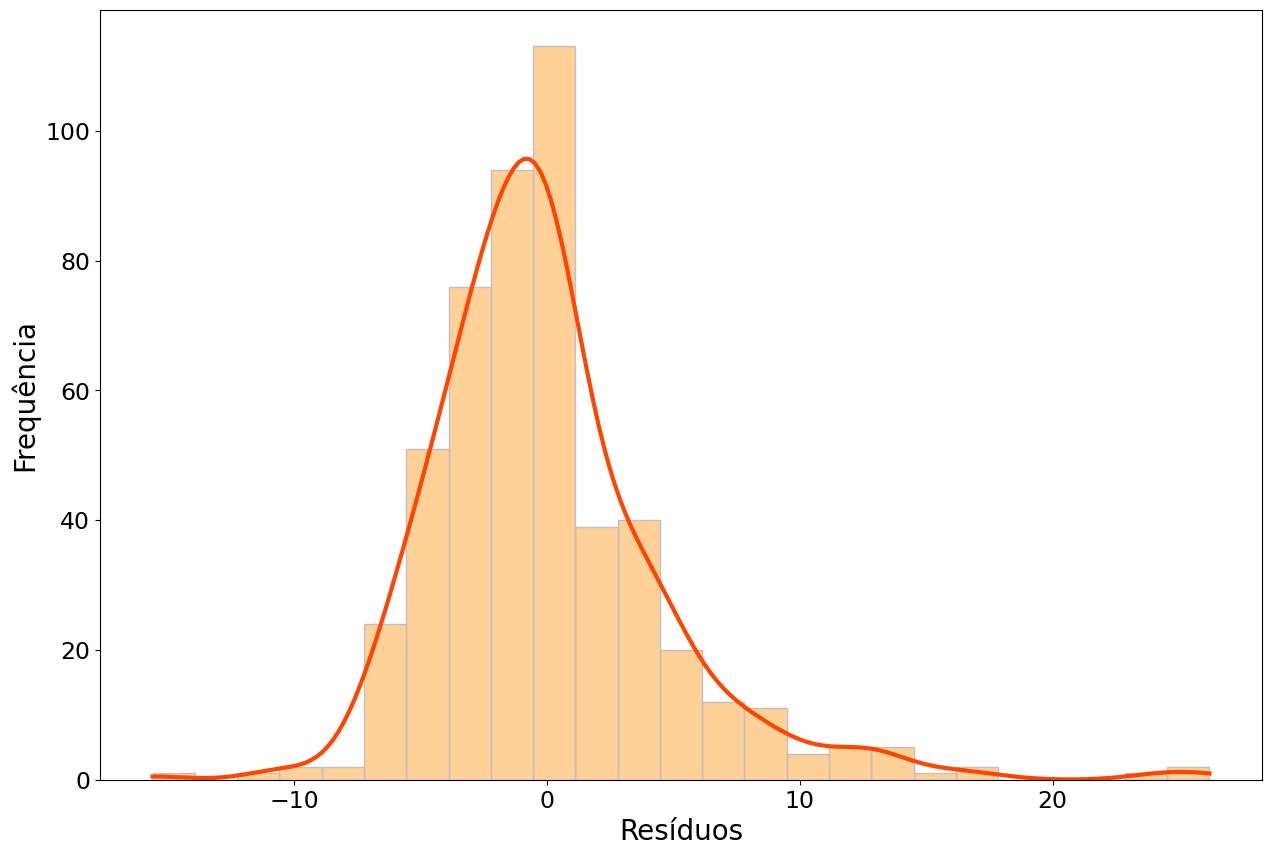

In [109]:
# plotagem dos resíduos do modelo 1
resid_plot(model1)

In [110]:
# Teste de Shapiro-Francia para o modelo 1
shapiro_francia_test(model1)

method  :  Shapiro-Francia normality test
statistics W  :  0.8986062971390174
statistics z  :  7.9267283165216735
p-value  :  1.124973915732462e-15
Statistics W=0.89861, p-value=0.000000
A distribuição dos resíduos NÃO é aderente à normalidade


### Modelo 2

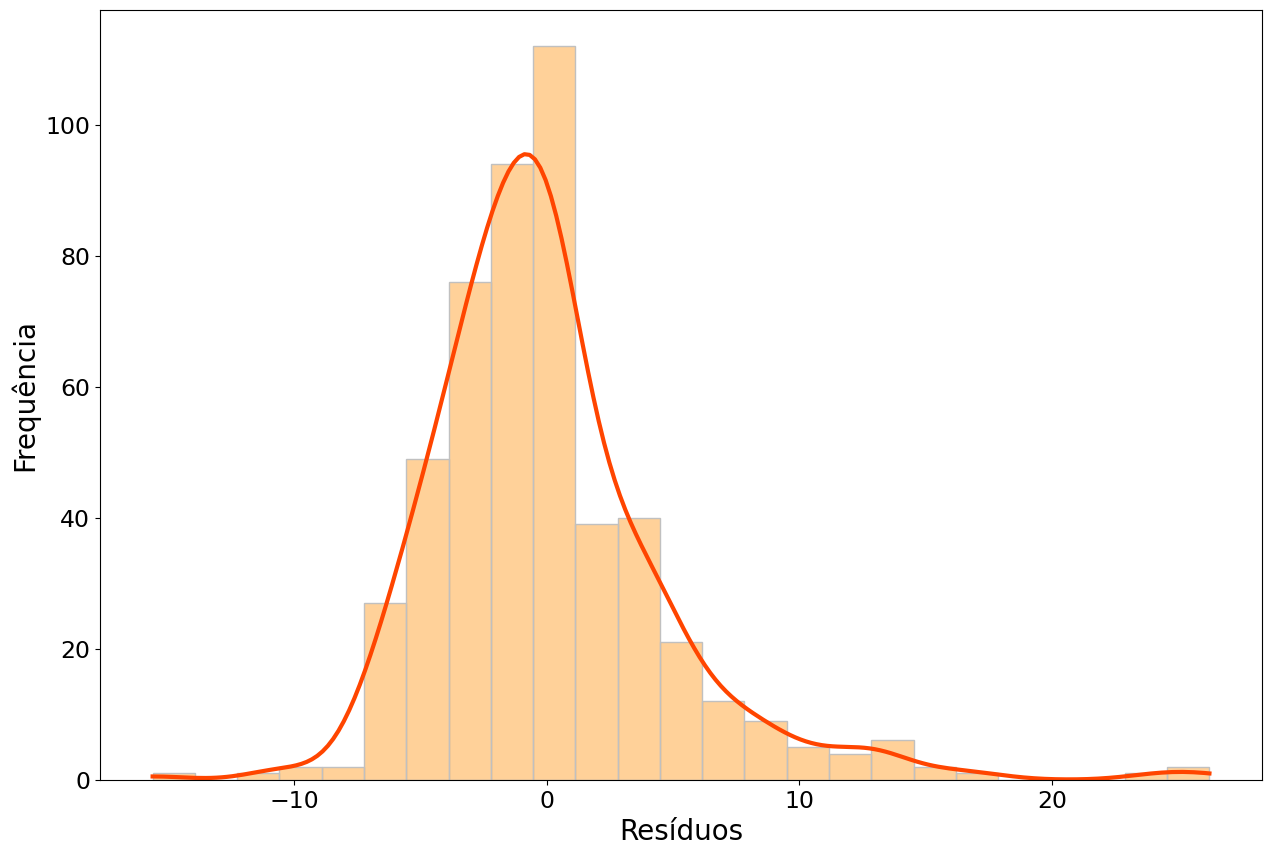

In [114]:
# plotagem dos resíduos do modelo 2
resid_plot(model2)

In [116]:
# Teste de Shapiro-Francia para o modelo 2
shapiro_francia_test(model2)

method  :  Shapiro-Francia normality test
statistics W  :  0.8985250154755623
statistics z  :  7.928487548066711
p-value  :  1.1091544820428313e-15
Statistics W=0.89853, p-value=0.000000
A distribuição dos resíduos NÃO é aderente à normalidade


### Reflexão sobre a aderência dos resíduos à normalidade
- Ambos modelos não possuem resíduos aderentes à normalidade;
- Este problema implica em:
    * Transforma a variável dependente com o método Box-Cox, para tentar normalizar a distribuição dos resíduos;
    * A forma funcional do modelo NÃO é linear;

# Tranformação dos modelos

### Criação de função para transformar o fittedvalues da transformação do Box-Cox

In [206]:
def boxcox_revert(fittedvalue, lmbda):
    return (fittedvalue * lmbda + 1) ** (1 / lmbda)


## Aplicação do Box-Cox

In [217]:
yhast, lmbda = boxcox(dfr['valor_medio_casas_ocupadas'])
lmbda

0.21662090066621686

In [123]:
y1.loc[:, 'bc_valor_medio_casas_ocupadas'] = yhast
y1

/var/folders/6f/zdjbw9xn1qb4y6jlx5lxvn400000gn/T/ipykernel_5986/2499644940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1.loc[:, 'bc_valor_medio_casas_ocupadas'] = yhast


,valor_medio_casas_ocupadas,bc_valor_medio_casas_ocupadas
0,24.0,4.572936
1,21.6,4.365582
2,34.7,5.336943
3,33.4,5.254954
4,36.2,5.428607
...,...,...
501,22.4,4.436621
502,20.6,4.273824
503,23.9,4.564629
504,22.0,4.401354


## Tranformação do modelo 1 com Box-Cox

### Criação do modelo 1 com box-cox

In [127]:
y1_bc = pd.DataFrame()
y1_bc = y1[['bc_valor_medio_casas_ocupadas']]

In [129]:
# Criação de novo modelo 1 com box-cox
model1_bc = sm.OLS(y1_bc, X1).fit()

### Sumário modelo 1 com box-cox

In [132]:
print(model1_bc.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bc_valor_medio_casas_ocupadas   R-squared:                       0.787
Model:                                       OLS   Adj. R-squared:                  0.781
Method:                            Least Squares   F-statistic:                     139.7
Date:                           Sun, 15 Sep 2024   Prob (F-statistic):          1.03e-155
Time:                                   10:31:15   Log-Likelihood:                -202.69
No. Observations:                            506   AIC:                             433.4
Df Residuals:                                492   BIC:                             492.5
Df Model:                                     13                                         
Covariance Type:                       nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0

### Reflexão sobre o modelo 1 com aplicação do box-cox
- Aparentemente houve melhora no R2 e R2 ajustado;
- Ainda é necessário a aplicação do teste de Shapiro-Francia para análise dos resíduos novamente.

## Tranformação do modelo 2 com Box-Cox

### Aplicação do Box-Cox para o modelo 2

In [137]:
y2.loc[:, 'bc_valor_medio_casas_ocupadas'] = yhast
y2

/var/folders/6f/zdjbw9xn1qb4y6jlx5lxvn400000gn/T/ipykernel_5986/4143140660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2.loc[:, 'bc_valor_medio_casas_ocupadas'] = yhast


,valor_medio_casas_ocupadas,bc_valor_medio_casas_ocupadas
0,24.0,4.572936
1,21.6,4.365582
2,34.7,5.336943
3,33.4,5.254954
4,36.2,5.428607
...,...,...
501,22.4,4.436621
502,20.6,4.273824
503,23.9,4.564629
504,22.0,4.401354


### Criação do modelo 2 com box-cox

In [140]:
y2_bc = pd.DataFrame()
y2_bc = y2[['bc_valor_medio_casas_ocupadas']]

In [142]:
model2_bc = sm.OLS(y2_bc, X2).fit()

### Sumário do modelo 2 com box-cox

In [145]:
print(model2_bc.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bc_valor_medio_casas_ocupadas   R-squared:                       0.787
Model:                                       OLS   Adj. R-squared:                  0.782
Method:                            Least Squares   F-statistic:                     165.5
Date:                           Sun, 15 Sep 2024   Prob (F-statistic):          8.98e-158
Time:                                   10:31:18   Log-Likelihood:                -203.07
No. Observations:                            506   AIC:                             430.1
Df Residuals:                                494   BIC:                             480.9
Df Model:                                     11                                         
Covariance Type:                       nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0

### Reflexão sobre o modelo 2 com aplicação do box-cox
- Aparentemente houve melhora no R2 e R2 ajustado;
- Ainda é necessário a aplicação do teste de Shapiro-Francia para análise dos resíduos novamente.

## Análise da aderência dos resíduos à normalidade após transformação de Box-Cox

### Teste do Modelo 1 box-cox

### Teste do Modelo 2 box-cox

In [151]:
shapiro_francia_test(model2_bc)

method  :  Shapiro-Francia normality test
statistics W  :  0.9470499042745526
statistics z  :  6.500456537254579
p-value  :  4.0038311291147735e-11
Statistics W=0.94705, p-value=0.000000
A distribuição dos resíduos NÃO é aderente à normalidade


### Reflexão sobre a aderência dos resíduos à normalidade após a transformação da variável dependente através do método de Box-Cox
- Mesmo com aplicação do Box-Cox os resíduos não são aderentes à normalidade;
- Indica que, talvez, a forma funcional seja não linear;

## Criação de modelos não lineares

### Modelo com especificação Semilogarítmica

In [156]:
y_log = pd.DataFrame()
y_log = np.log(y1[['valor_medio_casas_ocupadas']])
y_log

,valor_medio_casas_ocupadas
0,3.178054
1,3.072693
2,3.546740
3,3.508556
4,3.589059
...,...
501,3.109061
502,3.025291
503,3.173878
504,3.091042


In [158]:
model_log = sm.OLS(y_log, X1).fit()

In [160]:
print(model_log.summary())

                                OLS Regression Results                                
Dep. Variable:     valor_medio_casas_ocupadas   R-squared:                       0.790
Model:                                    OLS   Adj. R-squared:                  0.784
Method:                         Least Squares   F-statistic:                     142.1
Date:                        Sun, 15 Sep 2024   Prob (F-statistic):          4.07e-157
Time:                                10:31:29   Log-Likelihood:                 129.61
No. Observations:                         506   AIC:                            -231.2
Df Residuals:                             492   BIC:                            -172.1
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------

### Modelo com especificação Quadrática

In [163]:
y_quad = pd.DataFrame()
y_quad = np.square(y1[['valor_medio_casas_ocupadas']])
y_quad.head(3)

,valor_medio_casas_ocupadas
0,576.00
1,466.56
2,1204.09


In [165]:
model_squad = sm.OLS(y_quad, X1).fit()

In [167]:
print(model_squad.summary())

                                OLS Regression Results                                
Dep. Variable:     valor_medio_casas_ocupadas   R-squared:                       0.643
Model:                                    OLS   Adj. R-squared:                  0.634
Method:                         Least Squares   F-statistic:                     68.27
Date:                        Sun, 15 Sep 2024   Prob (F-statistic):          3.31e-101
Time:                                10:31:39   Log-Likelihood:                -3624.4
No. Observations:                         506   AIC:                             7277.
Df Residuals:                             492   BIC:                             7336.
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------

### Modelo com especificação em Potência

In [170]:
y_power = pd.DataFrame()
y_power = np.power(y1[['valor_medio_casas_ocupadas']], 1.5)
y_power.head(3)

,valor_medio_casas_ocupadas
0,117.575508
1,100.387728
2,204.406269


In [172]:
model_power = sm.OLS(y_power, X1).fit()

In [174]:
print(model_power.summary())

                                OLS Regression Results                                
Dep. Variable:     valor_medio_casas_ocupadas   R-squared:                       0.694
Model:                                    OLS   Adj. R-squared:                  0.686
Method:                         Least Squares   F-statistic:                     85.79
Date:                        Sun, 15 Sep 2024   Prob (F-statistic):          2.41e-117
Time:                                10:31:42   Log-Likelihood:                -2580.9
No. Observations:                         506   AIC:                             5190.
Df Residuals:                             492   BIC:                             5249.
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------

### Reflexão sobre os modelos não lineares
- Apesar do modelo com log ter demonstrado um pequeno ganho, não demonstrou ser superior aos modelos lineares;
- Os demais modelos não lineares, não demonstraram nenhum ganho em relação aos modelos lineares;
- Até este ponto do estudo, mesmo não tendo aderência dos resíduos à normalidade, o melhor modelo é o modelo 2 com box-cox.

# Comparação dos modelos criados

## Com R2 e R2 ajustado

In [179]:
df_models = pd.DataFrame()

features = [
    'modelo1_R2',
    'modelo1_R2_ajustado',
    'modelo2_R2',
    'modelo2_R2_ajustado',
    'modelo1_bc_R2',
    'modelo1_bc_R2_ajustado',
    'modelo2_bc_R2',
    'modelo2_bc_R2_ajustado',
    'modelo_semilogaritmico_R2',
    'modelo_semilogaritmico_R2_ajustado',
    'modelo_quadratico_R2',
    'modelo_quadratico_R2_ajustado',
    'modelo_potencia_R2',
    'modelo_potencia_R2_ajustado',
]

values = [
    model1.rsquared,
    model1.rsquared_adj,
    model2.rsquared,
    model2.rsquared_adj,
    model1_bc.rsquared,
    model1_bc.rsquared_adj,
    model2_bc.rsquared,
    model2_bc.rsquared_adj,
    model_log.rsquared,
    model_log.rsquared_adj,
    model_squad.rsquared,
    model_squad.rsquared_adj,
    model_power.rsquared,
    model_power.rsquared_adj,
]

df_models['features'] = features
df_models['Values'] = values
df_models.sort_values(by='Values', ascending=False)

,features,Values
8,modelo_semilogaritmico_R2,0.789641
4,modelo1_bc_R2,0.786843
6,modelo2_bc_R2,0.786522
9,modelo_semilogaritmico_R2_ajustado,0.784082
7,modelo2_bc_R2_ajustado,0.781768
5,modelo1_bc_R2_ajustado,0.781211
0,modelo1_R2,0.740643
2,modelo2_R2,0.740582
3,modelo2_R2_ajustado,0.734806
1,modelo1_R2_ajustado,0.733790


## Somente com R2 ajustado

In [182]:
df_models = pd.DataFrame()

features = [
    'modelo1_R2_ajustado',
    'modelo2_R2_ajustado',
    'modelo1_bc_R2_ajustado',
    'modelo2_bc_R2_ajustado',
    'modelo_semilogaritmico_R2_ajustado',
    'modelo_quadratico_R2_ajustado',
    'modelo_potencia_R2_ajustado',
]

values = [
    model1.rsquared_adj,
    model2.rsquared_adj,
    model1_bc.rsquared_adj,
    model2_bc.rsquared_adj,
    model_log.rsquared_adj,
    model_squad.rsquared_adj,
    model_power.rsquared_adj,
]

df_models['features'] = features
df_models['Values'] = values
df_models.sort_values(by='Values', ascending=False)

,features,Values
4,modelo_semilogaritmico_R2_ajustado,0.784082
3,modelo2_bc_R2_ajustado,0.781768
2,modelo1_bc_R2_ajustado,0.781211
1,modelo2_R2_ajustado,0.734806
0,modelo1_R2_ajustado,0.733790
6,modelo_potencia_R2_ajustado,0.685794
5,modelo_quadratico_R2_ajustado,0.633945


# Stepwise nos modelos Box-Cox

## Stepwise do modelo 1

In [186]:
model1_step = stepwise(model1_bc, pvalue_limit=.05)

Regression type: OLS 

Estimating model...: 
 bc_valor_medio_casas_ocupadas ~ Q('taxa_crime_p_cidade') + Q('proporcao_terreno_zoneados') + Q('proporcao_negocios_p_cidade') + Q('rio_charles') + Q('concentracao_oxidos_nitricos') + Q('numero_medio_comodos') + Q('proporcao_proprietarios_casas_1940') + Q('distancia_centro_empresarial') + Q('indice_accessibilidade_rodovias') + Q('taxa_imposto') + Q('proporcao_alunos_x_professor_p_cidade') + Q('proporcao_comunidade_negra_p_cidade') + Q('proporcao_pobreza')

 Discarding atribute "Q('proporcao_proprietarios_casas_1940')" with p-value equal to 0.8108754390699536 

Estimating model...: 
 bc_valor_medio_casas_ocupadas ~ Q('taxa_crime_p_cidade') + Q('proporcao_terreno_zoneados') + Q('proporcao_negocios_p_cidade') + Q('rio_charles') + Q('concentracao_oxidos_nitricos') + Q('numero_medio_comodos') + Q('distancia_centro_empresarial') + Q('indice_accessibilidade_rodovias') + Q('taxa_imposto') + Q('proporcao_alunos_x_professor_p_cidade') + Q('proporcao_c

### Reflexão sobre stepwise do primeiro modelo
- Como já havia sido feito pelo modelo 2, as variáveis independentes proporcao_proprietarios_casas_1940 e proporcao_negocios_p_cidade foram removidas do modelo

## Stepwise no modelo 2

In [190]:
model2_step = stepwise(model2_bc, pvalue_limit=.05)

Regression type: OLS 

Estimating model...: 
 bc_valor_medio_casas_ocupadas ~ Q('taxa_crime_p_cidade') + Q('proporcao_terreno_zoneados') + Q('rio_charles') + Q('concentracao_oxidos_nitricos') + Q('numero_medio_comodos') + Q('distancia_centro_empresarial') + Q('indice_accessibilidade_rodovias') + Q('taxa_imposto') + Q('proporcao_alunos_x_professor_p_cidade') + Q('proporcao_comunidade_negra_p_cidade') + Q('proporcao_pobreza')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 


 Model after stepwise process...: 
 bc_valor_medio_casas_ocupadas ~ Q('taxa_crime_p_cidade') + Q('proporcao_terreno_zoneados') + Q('rio_charles') + Q('concentracao_oxidos_nitricos') + Q('numero_medio_comodos') + Q('distancia_centro_empresarial') + Q('indice_accessibilidade_rodovias') + Q('taxa_imposto') + Q('proporcao_alunos_x_professor_p_cidade') + Q('proporcao_comunidade_negra_p_cidade') + Q('proporcao_pobreza') 

                                  OLS Regression Results  

### Reflexão sobre o modelo 2 após o Stepwise
- Não houve alteração no modelo 2, pois já havia sido removida as variáveis independentes sem significância estatística;
- Desta forma os modelos se igualam, não sendo necessários ambos;
- O modelo que será utilizado para previsões será o model1_step que será renomeado para model para facilitar;

In [193]:
model = model1_step
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bc_valor_medio_casas_ocupadas   R-squared:                       0.787
Model:                                       OLS   Adj. R-squared:                  0.782
Method:                            Least Squares   F-statistic:                     165.5
Date:                           Sun, 15 Sep 2024   Prob (F-statistic):          8.98e-158
Time:                                   10:31:47   Log-Likelihood:                -203.07
No. Observations:                            506   AIC:                             430.1
Df Residuals:                                494   BIC:                             480.9
Df Model:                                     11                                         
Covariance Type:                       nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025  

# RMSE

## Criação de função RMSE para medir a magnitude média dos erros de previsão, ou seja, a diferença entre os valores observados e os valores previstos pelo modelo.

In [197]:
def calculate_rmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    return rmse


## Avaliação do RMSE dos modelos

#### Antes de obter o fittedvalue, será feito a transformação para obter o valor real

In [212]:
fittedvalues = boxcox_revert(model.fittedvalues, lmbda)

In [214]:
calculate_rmse(dfr['valor_medio_casas_ocupadas'], fittedvalues)

4.3390822716112805

# Conclusão
- Após aplicação dos conceitos o melhor modelo foi o que teve transformação de Box-Cox. Ele será o modelo que será deployado em cloud.
- Observações:
    * Mesmo sendoo modelo escolhido, há Heterocedasticidade;
    * Existem outliers que não foram tratados nas variávies independentes taxa_crime_p_cidade, proporcao_terreno_zoneados e proporcao_comunidade_negra_p_cidade;
    * O modelo apresenta um RMSE (Root Mean Squared Error) de 4.34, indicando que, em média, os erros de previsão do modelo estão dentro dessa margem. Apesar disso, o RMSE sugere um bom ajuste comparado a outros modelos testados.

# Extração do Modelo escolhido para deploy

In [637]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)